In [1]:
%matplotlib inline
import sys
import os
working_dir_path = os.getcwd()
genomagic_qa_repo_path = '/'.join(working_dir_path.split('/')[:-1])
bp_units = 1000000

sys.path.append(genomagic_qa_repo_path)
import redshift.redshift_queries as rs

#change this parameters
host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
data_version='dm_gm_public_maize_232'

### ARG/WGS similarities

general similarity length : mean = 189.0 Kb, median = 87.5 Kb
ibd similarity length : mean = 236.1 Kb, median = 36.2 Kb
WITH temp_var1 AS (SELECT analysis_method as sample1_type,sample2,end_position-start_position as len, similarity_score FROM dm_gm_public_maize_232_haplotypes_similarity INNER JOIN dm_gm_public_maize_232_samples ON dm_gm_public_maize_232_haplotypes_similarity.sample1=dm_gm_public_maize_232_samples.sample_id), hap_sim_types_table AS (SELECT sample1_type,analysis_method as sample2_type, len, similarity_score FROM temp_var1 INNER JOIN dm_gm_public_maize_232_samples ON temp_var1.sample2=dm_gm_public_maize_232_samples.sample_id), score_and_len_from_hap_sim_table as (SELECT len,similarity_score FROM hap_sim_types_table WHERE (sample1_type='whole_genome_sequencing' AND sample2_type='whole_genome_sequencing') OR (sample1_type='applied_reference_genome' AND sample2_type='whole_genome_sequencing') OR (sample1_type='whole_genome_sequencing' AND sample2_type='applied_reference_gen

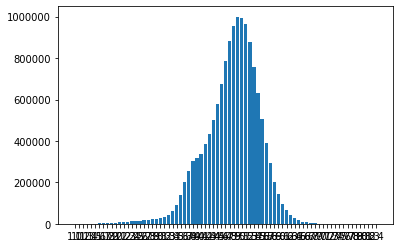

In [2]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'whole_genome_sequencing'])
sample_pair_types.append(['applied_reference_genome', 'whole_genome_sequencing'])
sample_pair_types.append(['whole_genome_sequencing', 'applied_reference_genome'])
sample_pair_types.append(['applied_reference_genome', 'applied_reference_genome'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)

### gbs similarities

general similarity length : mean = 1582.5 Kb, median = 777.9 Kb
ibd similarity length : mean = 1856.9 Kb, median = 394.3 Kb
WITH temp_var1 AS (SELECT analysis_method as sample1_type,sample2,end_position-start_position as len, similarity_score FROM dm_gm_public_maize_232_haplotypes_similarity INNER JOIN dm_gm_public_maize_232_samples ON dm_gm_public_maize_232_haplotypes_similarity.sample1=dm_gm_public_maize_232_samples.sample_id), hap_sim_types_table AS (SELECT sample1_type,analysis_method as sample2_type, len, similarity_score FROM temp_var1 INNER JOIN dm_gm_public_maize_232_samples ON temp_var1.sample2=dm_gm_public_maize_232_samples.sample_id), score_and_len_from_hap_sim_table as (SELECT len,similarity_score FROM hap_sim_types_table WHERE (sample1_type='whole_genome_sequencing' AND sample2_type='genotyping_by_sequencing') OR (sample1_type='applied_reference_genome' AND sample2_type='genotyping_by_sequencing') OR (sample1_type='genotyping_by_sequencing' AND sample2_type='whole_genome_s

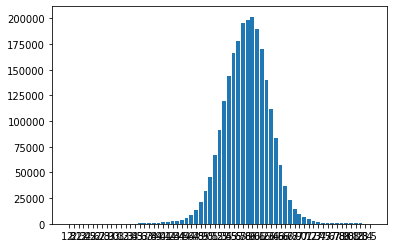

In [3]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'genotyping_by_sequencing'])
sample_pair_types.append(['applied_reference_genome', 'genotyping_by_sequencing'])
sample_pair_types.append(['genotyping_by_sequencing', 'whole_genome_sequencing'])
sample_pair_types.append(['genotyping_by_sequencing', 'applied_reference_genome'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)

### snp similarities

general similarity length : mean = 11859.2 Kb, median = 6633.5 Kb
ibd similarity length : mean = 11880.7 Kb, median = 6642.9 Kb
WITH temp_var1 AS (SELECT analysis_method as sample1_type,sample2,end_position-start_position as len, similarity_score FROM dm_gm_public_maize_232_haplotypes_similarity INNER JOIN dm_gm_public_maize_232_samples ON dm_gm_public_maize_232_haplotypes_similarity.sample1=dm_gm_public_maize_232_samples.sample_id), hap_sim_types_table AS (SELECT sample1_type,analysis_method as sample2_type, len, similarity_score FROM temp_var1 INNER JOIN dm_gm_public_maize_232_samples ON temp_var1.sample2=dm_gm_public_maize_232_samples.sample_id), score_and_len_from_hap_sim_table as (SELECT len,similarity_score FROM hap_sim_types_table WHERE (sample1_type='whole_genome_sequencing' AND sample2_type='snp_marker') OR (sample1_type='applied_reference_genome' AND sample2_type='snp_marker') OR (sample1_type='snp_marker' AND sample2_type='whole_genome_sequencing') OR (sample1_type='snp_mark

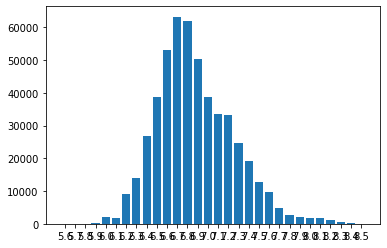

In [4]:
sample_pair_types = []
sample_pair_types.append(['whole_genome_sequencing', 'snp_marker'])
sample_pair_types.append(['applied_reference_genome', 'snp_marker'])
sample_pair_types.append(['snp_marker', 'whole_genome_sequencing'])
sample_pair_types.append(['snp_marker', 'applied_reference_genome'])
sample_pair_types.append(['snp_marker', 'snp_marker'])
mean_all = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
mean_ibd = rs.get_average_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
median_all = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0)
median_ibd = rs.get_median_length_of_hap_similarity(host, data_version, sample_pair_types, 0.9)
bp_units = 1000
print('general similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_all/bp_units, median_all/bp_units))
print('ibd similarity length : mean = {:.1f} Kb, median = {:.1f} Kb'.format(mean_ibd/bp_units, median_ibd/bp_units))
rs.compute_sim_len_histogram(host, data_version, sample_pair_types, 0)